# Cancer Health Data Analytics
Done in concurrent with, Kaggle Analytics

In [52]:
import pandas as pd
path = r'C:\Users\ADEKUNLE\Desktop\Web Scrape'
health_data = pd.read_csv(path + r'\fullData.csv', encoding = 'ISO-8859-1', header = 0, \
                          index_col = 0)

#Check if there exist any null value
health_data.isnull().values.any()

The dataframe appears to be okay(that will be after you have filled the various aspect that you need to), what to do next will be to select features that will be useful to intuit some great stuffs, probably popEst2015, MedIncome, deathRate, IncidenceRate, avgDeathsPerYear, County(you may need to split to get the State) and Name

Questions to Answer
* Reviewing StudyCount effect on incidence rate

In [66]:
new_HealthDF = health_data.ix[:, ['studyCount','PovertyEst', 'medIncome', 'popEst2015', 'incidenceRate', 'recentTrend']]

print(new_HealthDF.head())
print('-------------------')
new_HealthDF.info()

   studyCount  PovertyEst  medIncome  popEst2015  incidenceRate recentTrend
0         0.0     80178.0    49072.0    470690.0          442.9      stable
1         0.0     80178.0    49072.0    470690.0          442.9      stable
2         3.0     80178.0    49072.0    470690.0          442.9      stable
3         6.0     80178.0    49072.0    470690.0          442.9      stable
4         0.0     80178.0    49072.0    470690.0          442.9      stable
-------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32551 entries, 0 to 32550
Data columns (total 6 columns):
studyCount       32551 non-null float64
PovertyEst       32551 non-null float64
medIncome        32551 non-null float64
popEst2015       32551 non-null float64
incidenceRate    32551 non-null float64
recentTrend      32551 non-null object
dtypes: float64(5), object(1)
memory usage: 1.7+ MB


The Data contains some funny values in the 'recentTrend' column, so replacing them using the replace() function in pandas that work well on pandas series, and the kind of filling is 'pad'.

In [117]:
#Replace unclean values in the 'recentTrend' Column
print(new_HealthDF['recentTrend'].unique())

#new_HealthDF['recentTrend'].replace(['*', '¶', '¶¶'], method = 'pad', inplace= True)

['stable' 'falling' 'rising']


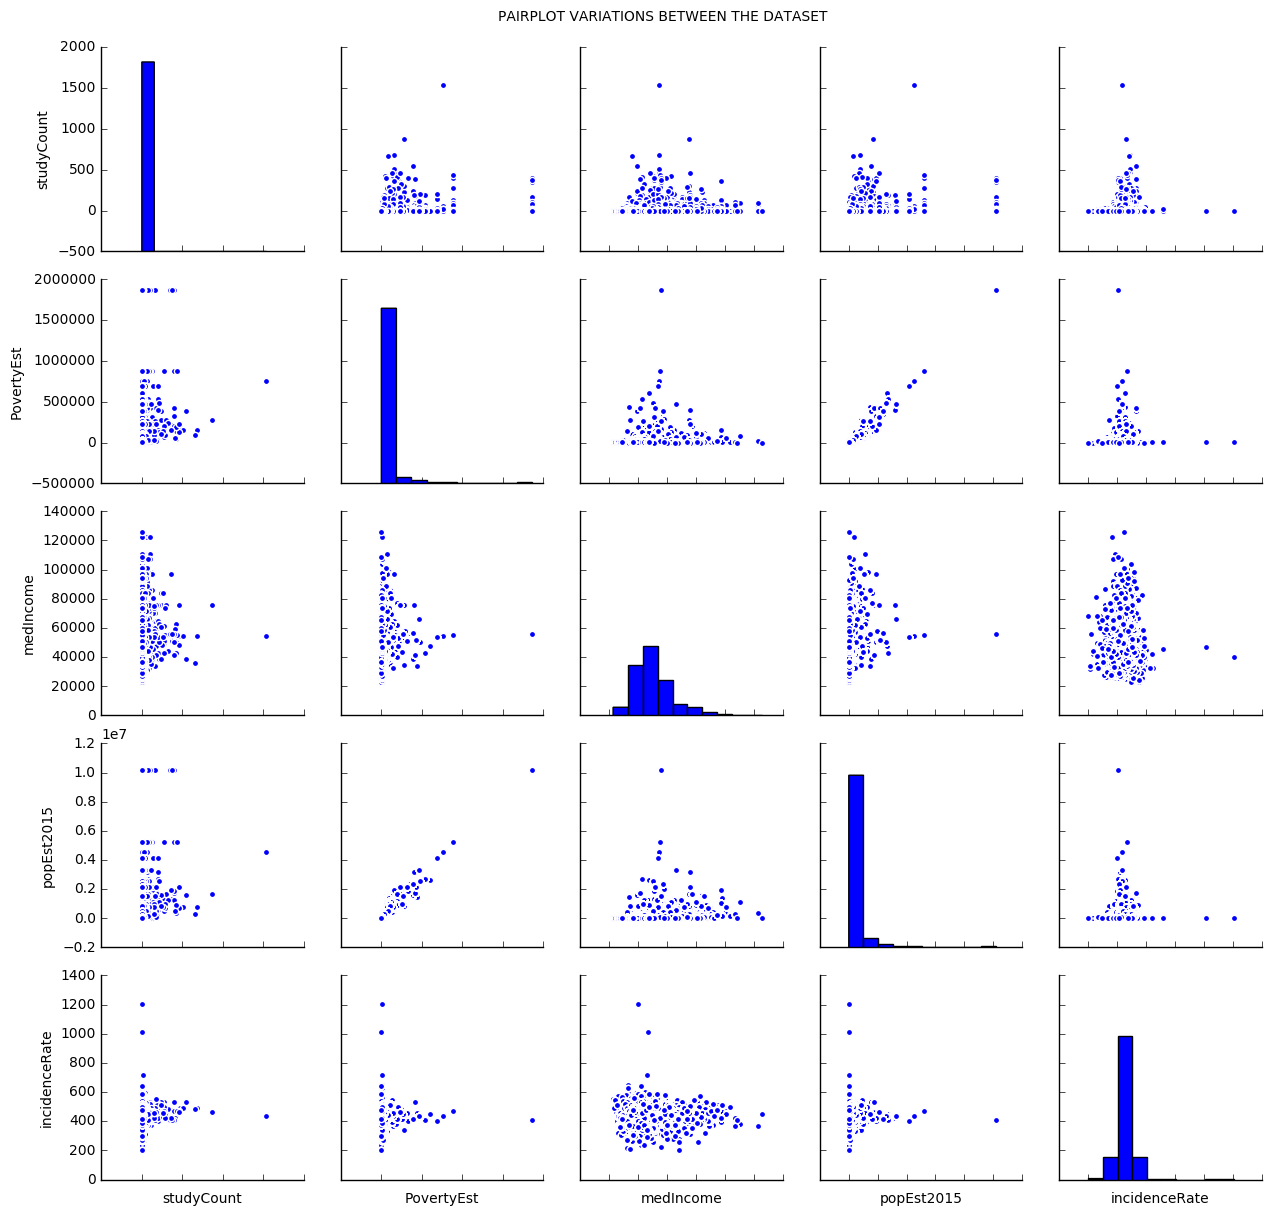

In [118]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

g = sb.pairplot(new_HealthDF)
g.set(xticklabels = []) #This help remove the x label value, and replace with only the column Title

#Add title to your plot 
g.fig.suptitle('PAIRPLOT VARIATIONS BETWEEN THE DATASET')
g.fig.subplots_adjust(top = 0.95) #This will help leave enough space for the title to stay on

Good!, the Data does not have any null value, so we are good
Also, its good to observe that what we are looking at is the data against 'Recent Trend' and 'rec Trend'

In [31]:
health_data['recTrend'].unique()

array(['falling', 'stable', 'rising', '**'], dtype=object)

In [ ]:
#Check where the values of '*', and other symbol is in 'recentTrend' and replace them rightly
#Do same for 'recTrend'

In [61]:
health_data['County'].unique()

array(['Hampden County, Massachusetts(6,10)',
       'Hampshire County, Massachusetts(6,10)',
       'Worcester County, Massachusetts(6,10)', ...,
       'Haines Borough, Alaska(6,10)', 'Sitka Borough, Alaska(6,10)',
       'Ketchikan Gateway Borough, Alaska(6,10)'], dtype=object)